<a href="https://colab.research.google.com/github/momopmkr/momo/blob/main/%EC%96%B4%EB%A6%B0%EC%99%95%EC%9E%90_%EC%B1%85_%EB%AA%85%EC%82%AC_%EB%B9%88%EB%8F%84%EC%88%98_%EC%83%81%EC%9C%84_20%EA%B0%9C_%EA%B5%AC%ED%95%98%EA%B8%B0_%EC%95%88%EC%9D%80%EC%98%81_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (52.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120893 files and direc

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install konlpy
!pip install sklearn
!pip install WordCloud

  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import csv

with open('./sample_data/어린왕자.txt', 'r', encoding='cp949') as f:
  text = f.read()

okt = Okt()
words=okt.nouns(text) # 명사만 추출
words = [n for n in words if len(n) > 1] # 단어의 길이가 1개인 것은 제외

count = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
f.close()

noun_list=count.most_common(20)

for v in noun_list:
  print(v)

with open("./sample_data/어린왕자_명사리스트.txt",'w', newline='',encoding='euc-kr') as f:
  csvw=csv.writer(f)
  for v in noun_list:
    csvw.writerow(v)

#with open("./sample_data/어린왕자_명사리스트.txt",'w',encoding='cp949') as f:
# for v in noun_list:
#	f.write(" ".join(map(str,v)))
#	f.write("\n")


('왕자', 183)
('사람', 133)
('그것', 56)
('다시', 54)
('생각', 52)
('대답', 50)
('아저씨', 41)
('때문', 34)
('여우', 34)
('그림', 32)
('가로등', 31)
('아주', 29)
('가지', 28)
('하나', 27)
('다른', 27)
('거지', 27)
('이야기', 26)
('친구', 26)
('아무', 26)
('어른', 25)


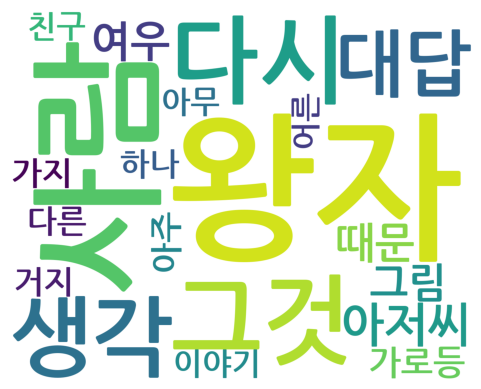

In [3]:
import sys
# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
#font_path = 'malgun'  # C:/Windows/Fonts/
#font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1500, height = 1200, background_color="white", font_path = font_path)
plt.imshow(wc.generate_from_frequencies(dict(noun_list))) #딕셔너리
plt.axis("off")
plt.show()
wc.to_file(f'./sample_data/어린왕자_워드클라우드.png')
